# Assignment 3
---

Full assignment is avilable [here](https://docs.google.com/document/d/19JNioy6QysuSi8A_7G2sryXHnZhVkE-R7fTM4res_F4).

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.special as ss

## Task A

---

**1)** Use Eq. (4.9) graphically in Table 4.1 to calculate the conditional probability . 
* By graphically I mean circle/highlight with a (digital) pen the probabilities in the table corresponding to the numerator and denominator in (4.9). 
* Please reason why the ratio of these areas makes sense. You may use the classical definition of probability.

___

**Answer**:  

![](Table4_1_marked.png)

The denominator is marked in green and the nominator is marked in red.  
The reason that this makes sense is that given the condition on "blonde AND red" shifts our attention over to the two right columns. Then within this subset it is the row corresponding to "Blue" that is of interest. The sum of that row within the subset is then normalized with the total probability of the subset.

---
**2)** Solve Exercise 5.1 on page 118 using a function that takes an input argument that represents the person’s sequential test results and returns the posterior probability of having the disease and not having the disease. For example, let T=’+-’ be an input argument string to your function representing a random individual who first tested positive and then negative. Let the function return a two element list or a two element array of the posterior probabilities  
\[ p( happy | T ), p( sad | T )\].


* Use the last paragraph in section 5.1.2 (on page 104-105) and section 5.2.1 (page 107-108) to explaining how the algorithm works sequentially, starting from the prior probabilities (i.e. without any test results) and then moving on sequentially with access to new test results. If the function is given an empty string T = ‘’ it returns the prior probabilities and then sequentially updates the posterior.

---

**Answer**:  
The function below calculates the probibilites as follows:

1. The priori likelihood and evidence for the first test is calculated from table XX .
2. Calculate the posterior probabilities using Bayes' theorem.
3. Set the priori for the second test to the posterior for the first test.
4. Calculate the likelihood assuming independence.
5. Calculate the new evidence by summing over the likelihood.
6. Calculate the posterior probabilities for the second test using Bayes' theorem.


---

In [7]:
def test_results(tests):
    # :) indicates not having the disease
    # :( indicates having the disease
    # + indicates a positiv test
    # - indicates not having thet diseas
    
    
    #Create empty dictionary
    P = {}
    
    #Take likelihood from table in the book
    P[":("] = 0.001
    P[":)"] = 1.0-P[":("]
    P["+|:("] = 0.99
    P["+|:)"] = 0.05
    P["-|:("] = 1.0 - P["+|:("]
    P["-|:)"] = 1.0 - P["+|:)"]
    
    
    # Calculate the total evidence for a positive and a negative test.
    P["+"] = P["+|:)"]*P[":)"] + P["+|:("]*P[":("]
    P["-"] = P["-|:)"]*P[":)"] + P["-|:("]*P[":("]
    
    #Compute the posterior for the first test
    P[':(|+'] = P['+|:(']*P[':(']/P['+']
    P[':)|+'] = P['+|:)']*P[':)']/P['+']
    P[':(|-'] = P['-|:(']*P[':(']/P['-']
    P[':)|-'] = P['-|:)']*P[':)']/P['-']
    
    #Compute likelihood for the second test
    P['++|:('] = P['+|:(']**2
    P['+-|:('] = P['+|:(']*P['-|:(']
    P['-+|:('] = P['-|:(']*P['+|:(']
    P['--|:('] = P['-|:(']**2
    
    P['++|:)'] = P['+|:)']**2
    P['+-|:)'] = P['+|:)']*P['-|:)']
    P['-+|:)'] = P['-|:)']*P['+|:)']
    P['--|:)'] = P['-|:)']**2
    
    #Compute the evidence using the posterior from the first test as the priori
    P['++'] = P['++|:(']*P[':(|+'] + P['++|:)']*P[':)|+']
    P['--'] = P['--|:(']*P[':(|-'] + P['--|:)']*P[':)|-']
    
    P['+-'] = P['+-|:(']*P[':(|+'] + P['+-|:)']*P[':)|+']
    P['-+'] = P['-+|:(']*P[':(|-'] + P['-+|:)']*P[':)|-']
    
    #Compute the posterior for the second test
    P[':(|++'] = P['++|:(']*P[':(|+']/P['++']
    P[':)|++'] = P['++|:)']*P[':)|+']/P['++']
    
    P[':(|--'] = P['--|:(']*P[':(|-']/P['--']
    P[':)|--'] = P['--|:)']*P[':)|-']/P['--']
    
    
    P[':(|+-'] = P['+-|:(']*P[':(|+']/P['+-']
    P[':)|+-'] = P['+-|:)']*P[':)|+']/P['+-']
    
    P[':(|-+'] = P['-+|:(']*P[':(|-']/P['-+']
    P[':)|-+'] = P['-+|:)']*P[':)|-']/P['-+']


    #Return whats asked for
    if tests == '++':
        return P[':)|++'],P[':(|++']
    elif tests == '--':
        return P[':)|--'],P[':(|--']
    elif tests == '+-':
        return P[':)|+-'],P[':(|+-']
    elif tests == '-+':
        return P[':)|-+'],P[':(|-+']            
    else:
        return P[':)'], P[':(']



**Evaluate the different cases:**

In [8]:
happy,sad = test_results('++')
print("++")
print("Probability for not having disease: \t %f" %happy)
print("Probability for having disease: \t %f" %sad)

happy,sad = test_results('--')
print("--")
print("Probability for not having disease: \t %f" %happy)
print("Probability for having disease: \t %f" %sad)


happy,sad = test_results('+-')
print("+-")
print("Probability for not having disease: \t %f" %happy)
print("Probability for having disease: \t %f" %sad)

happy,sad = test_results('-+')
print("-+")
print("Probability for not having disease: \t %f" %happy)

print("Probability for having disease: \t %f" %sad)

++
Probability for not having disease: 	 0.114023
Probability for having disease: 	 0.885977
--
Probability for not having disease: 	 1.000000
Probability for having disease: 	 0.000000
+-
Probability for not having disease: 	 0.995886
Probability for having disease: 	 0.004114
-+
Probability for not having disease: 	 0.999998
Probability for having disease: 	 0.000002


---
# Task B

---

Finally we will try to take the first steps in applying Bayesian models on data.

We will start by reproducing the “inferring bias in a coin” example in the book (Ch 5 & 6). As pointed out by the author, this is a toy example but the same model applies to many different situations that you may be faced with (see e.g. the analogies given by the author on page 73 and 124 in the book).


**1.** The probability of each outcome is given by the Bernoulli distribution Eq. (6.1).  
**Answer**:  


In [9]:
def Bernulli(y,theta):
    #Return Bernulli pmf for outcome y given parameter theta
    return (theta**y)*(1.0-theta)**(1.0-y)
def likelihood(y,theta):
    return np.prod(Bernulli(y,theta))

**2.** It is a discrete distribution of the outcome  or  for a fixed . Plot the outcome probabilities given  and  using a bar or a stem plot.  


**Answer**:

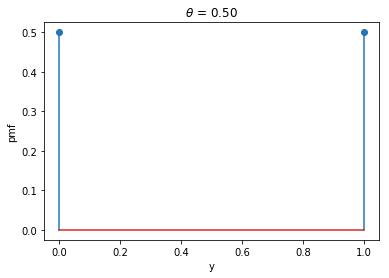

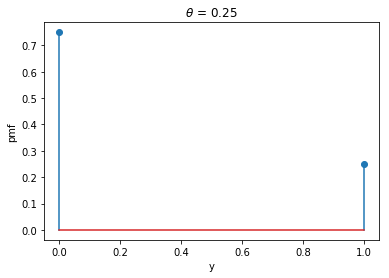

In [26]:
theta_vec = [0.5,0.25]              #Set values


for theta in theta_vec: 
    pmf0 = Bernulli(0,theta) #Generate pmf
    pmf1 = Bernulli(1,theta)
    plt.figure()
    plt.stem([0,1],[pmf0,pmf1])
    plt.title(r"$\theta$ = %.2f" %theta)
    plt.xlabel('y')
    plt.ylabel('pmf')

**3.** Given a certain outcome, say $y=1$ , we can plot the likelihood of our parameter $\theta$ . Note that when evaluating (6.1) with respect to $\theta$ for a fixed outcome $y$, it is called a likelihood function and it is not a probability distribution since it will not integrate to 1. For $y = 0$ and $y = 1$ plot the likelihood function for $\theta \in [0,1]$

Text(0,0.5,'Likelihood function')

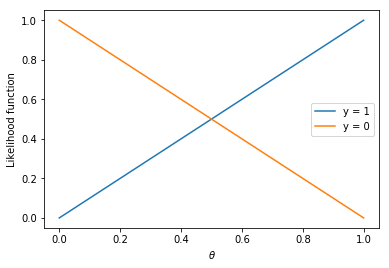

In [64]:
# Generate theta values
theta = np.linspace(0,1,101)

#Evaluate Bernulli for a single outcome
likelihood_1 = Bernulli(np.array([1]),theta)
likelihood_0 = Bernulli(np.array([0]),theta)

plt.figure()
plt.plot(theta,likelihood_1,theta,likelihood_0)
plt.legend(["y = 1","y = 0"])
plt.xlabel(r"$\theta$")
plt.ylabel("Likelihood function")

**4a.** Now we will assume independence, row one in Eq. (6.2), and that the coin flips are independent of each other. It means that knowledge of the outcome of one flip do not change the outcome probabilities for other flips. It seems like a valid assumption unless the coin is made out of thin aluminium and we bend it more and more from flip to flip (click here to see a funny example of a bent coin).
Implement two functions: 
* the first is just Eq. (6.1) and 
* the other function is just the product of the first function over the data as the first row in Eq. (6.2).


Create a vector of  coin flips, using your script from Assignment 2. Evaluate the likelihood function for  for . What happens for large values of ?  

In [29]:
#The functions asked for was implimented earlier in this notebook
p = 0.5
for n in [10,1000,100000]:
    # Generate data
    data = np.random.binomial(1,p,n-1)
    #Calculate the likelihood
    Lhood = likelihood(data,p)
    print("n = ",n,'\t',Lhood)


n =  10 	 0.001953125
n =  1000 	 1.8665272370064378e-301
n =  100000 	 0.0


The likelihood approaches zero when n increases. Eventually it will underflow and return 0.0

**4.b** A product, as in Eq. (6.2), should be avoided as it may easily lead to overflow or underflow. Instead, we will often (always) in this course use the log-likelihood function, i.e. under the logarithm the product can be expressed as a summation, to avoid these problems. Please read the section on why we work with the log-likelihood here. Implement the logarithm versions of these two functions, i.e. the log-likelihood and the log-pdf, using the trick of logarithm and summation instead. Can you evaluate the log-likelihood for larger  without problems of under- or overflow?  

In [78]:
def log_bernulli(y,theta):
    #Return Bernulli pmf for outcome y given parameter theta
    return np.log((theta**y)*(1.0-theta)**(1.0-y))
def log_likelihood(y,theta):
    # Theta needs to be a np.ndarry even if its single value

    out = np.zeros_like(theta)
    for i,th in enumerate(theta):
        out[i] = np.sum(log_bernulli(y,th))

    return out


Now lets re-calculate the log likelihood

In [79]:
p = np.array([0.5])
for n in np.array([10,1000,100000,10000000]):
    data = np.random.binomial(1,p,n-1)
    Lhood = log_likelihood(data,p)
    print("n = ",n,'\t',Lhood)

n =  10 	 [-6.23832463]
n =  1000 	 [-692.45403338]
n =  100000 	 [-69314.02490881]
n =  10000000 	 [-6931471.11245207]


The output does not underflow anymore, even for larger n.

---

**c** At the final step, if absolutely necessary, one can exponentiate the log-likelihood function to obtain the likelihood value. However, for this particular example it will still be problematic as exponentiating large negative values will result in zero.  

**d.** Plot the likelihood function (use either the likelihood or preferable exp(log-likelihood)) with respect to  given:
* $y = [1]$
* $y = [1,1]$
* $y = [1,1,0,1]$

First I check if the log likelihood works as in task **3**, and it seams to work.

C:\Users\johohm-local\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'Likelihood function')

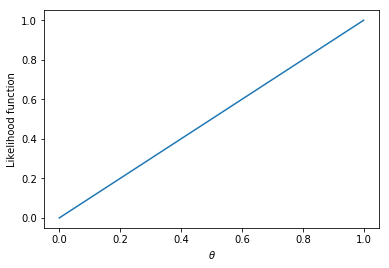

In [82]:
#Generate theta values
theta = np.linspace(0,1,101)

#Calculate the log_likelohood
Lhood = log_bernulli(1,theta)
plt.figure()
plt.plot(theta,np.exp(Lhood))
plt.xlabel(r"$\theta$")
plt.ylabel("Likelihood function")

Now lets run with the given observations

C:\Users\johohm-local\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'Likelihood function')

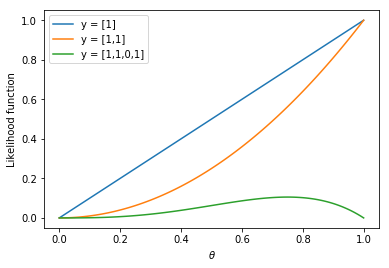

In [83]:
theta = np.linspace(0,1,101)

#List of the three different observations
observations = [
    np.array([1]),
    np.array([1,1]),
    np.array([1,1,0,1])
]

#Create figure
plt.figure()
for data in observations:
    #Get data and plot the exp(log-likelihood)
    Lhood = log_likelihood(data,theta)
    plt.plot(theta,np.exp(Lhood))

    #Add labels and legend
plt.legend(['y = [1]','y = [1,1]','y = [1,1,0,1]'])
plt.xlabel(r'$\theta$')
plt.ylabel('Likelihood function')



Given the observation $y=[1]$ it is more likely that $\theta > 0.5$. When an additional observation is made and that also is $y = 1$ it further skews the function. When $y = [1,1,0,1]$ it becomes much more uncertain since now a $y = 0$ is also observer and the likelihood becomes much more broad.

**5aii.** Use the posterior distribution in (6.8) and make new plots for the data sets given in the bullet (4.d) above. Please implement the log-posterior, taking advantage of the trick we learned before, and at the very utmost expression take the exponential.

1. What is the difference between these figures and the figures you did previously using the likelihood?
2. Compare the mathematical expression of the likelihood in (6.1) and (6.2) with expression (6.8) for a=1 and b=1. Can the differences in the expressions explain the difference seen in the figures?
3. As in Task A.2.a the estimation process can also be updated sequentially. Due to the property that the prior distribution is of the same form as the posterior, i.e. a conjugate prior distribution, this sequential updating can here also be seen directly in the expression (6.8) for this example, as noted in the last paragraph in section 6.3. Read it and understand it!

In [87]:
def posterior_gamma(data,a,b,theta):
    
    
#    z = np.sum(data)
#    N = data.size
#    d_theta = theta[1] - theta[0]
#    B = np.sum(theta**(z+a-1)*(1-theta)**(N-z+b-1)*d_theta)
#    return theta**(z+a-1) * (1 - theta)**(N-z+b-1)/B


    z = np.sum(data) #Get total numbers of y=1
    N = data.size    #Get total numbers of samples
    d_theta = theta[1] - theta[0]  #Get dtheta for the integration of B constant
    B = np.sum(theta**(z+a-1)*(1-theta)**(N-z+b-1)*d_theta)  #Calculate B
    return np.exp(np.log(theta)*(z+a-1) + np.log(1 - theta)*(N-z+b-1)-np.log(B))  #Calculate log-posterior

C:\Users\johohm-local\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
C:\Users\johohm-local\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


Text(0,0.5,'Posteri distribution')

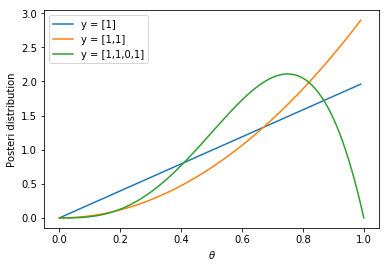

In [89]:

theta = np.linspace(0,1,101)

observations = [
    np.array([1]),
    np.array([1,1]),
    np.array([1,1,0,1])
]

a,b = 1,1

plt.figure()
for data in observations:
    #Calculate the posterior and plot it in the same window
    post = posterior_gamma(data,a,b,theta)
    plt.plot(theta,post)
    
plt.legend(['y = [1]','y = [1,1]','y = [1,1,0,1]'])
plt.xlabel(r'$\theta$')
plt.ylabel('Posteri distribution')

**Answer:**  
1. These posterios how is a compromise between the likelihood and the priori but since the prior is just a uniform distribution the shape is preserved. So the only difference is that it integrates to unity.
2. Comparing Eq.(6.2)  

$p(\{y_i\}|\theta) = \theta^z(1-\theta)^{N-z}$  

with Eq(6.8) for $a=1$ and $b=1$  

$p(\theta|z,n) = \theta^z (1-\theta)^{N-z} / B(1,1)$  

we see that the expressions are the same except for a constant.

# Reproducing Fig 6.4

**5aiii.**
Assume now more informative prior information and reproduce Figure 6.4 in the book. Note that the last three figures in column 3 you have already managed to work out from the above tasks. 
To see the relationship between mode and sample size versus a and b in the beta distribution, see Appendix 6.6. If you are in a hurry, skip legends, labels, HDI, title etc


C:\Users\johohm-local\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\johohm-local\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


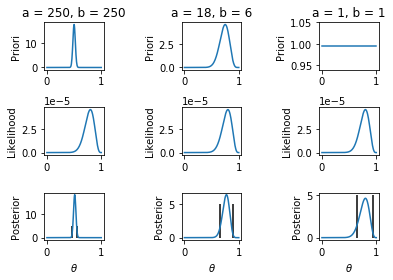

In [108]:
from scipy.stats import beta as beta_imp
def beta(a,b,theta):

    d_theta = theta[1] - theta[0]
    B = np.sum(theta**(a-1)*(1-theta)**(b-1)*d_theta)
    return theta**(a-1) * (1 - theta)**(b-1)/B

data = np.zeros(20)
data[0:16] = 1

theta = np.linspace(0,1,201)
alpha = 0.05
plt.figure()


#Generate a and b parameters for the three different columns 
left = 250,250
middle = 0.75*(25-2)+1,(1-0.75)*(25-2)+1
right = 1,1
#Stack them into a list
priors_parameters = [
    left,
    middle,
    right]

#Loop over the list
for i,ab in enumerate(priors_parameters):
    #Extract values from the tuple
    a = ab[0]
    b = ab[1]
    
    # Calculate the priori from the beta-distribution
    bb = beta(a,b,theta)

    # Plot it with a and b in the title 
    plt.subplot(3,3,(i+1))
    plt.plot(theta,bb)
    plt.ylabel('Priori')
    plt.title('a = %.1d, b = %.1d' %(a,b))
    
    
    #Calculate the log-likelihood
    Lhood = log_likelihood(data,theta)
    
    #Plot it and format axes
    plt.subplot(3,3,i+4)
    plt.plot(theta,np.exp(Lhood))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.ylabel('Likelihood')
    
    #Calculate the posterior
    post = posterior_gamma(data,a,b,theta)
    #Plot it and format axes
    plt.subplot(3,3,i+7)
    plt.plot(theta,post)
    plt.xlabel(r'$\theta$')
    plt.ylabel('Posterior')
    
    #Calculate the HDI using the importet beta function and the confidence intervalls. Found this implementation online!
    l, u = beta_imp.ppf(alpha / 2, a +17, b+3), beta_imp.ppf(1 - alpha / 2, a+17, b+3)
    plt.vlines(l,0,5)
    plt.vlines(u,0,5)
    
plt.subplots_adjust(hspace = 0.8,wspace = 1.3)
plt.savefig('Fig64.png',dpi=600)


# The Result!

![](Fig64.png)


### Anyone know a better way of plotting the HDI?

**5.b** We have here been using Bayesian analysis the hard way. The final task is to read the summary in Section 6.5 carefully. It will recap some of the challenges we are faced with trying to figure out the denominator in (5.9) (i.e. the normalizing factor) and how we can overcome this using other techniques that we will soon learn.  